# Competència
- Valoració de la similitud
- Informació desconeguda (valors que falten)
- Discretització
- Cerca infructuosa / Pèrdua de casos en estructures
jeràrquiques
# Eficiència en Temps
- Degradació de les estructures jeràrquiques
- Overhead d'aprenentatge
# Eficiència en Espai
- Quan és necessari aprendre un cas nou?
- Hem d'oblidar alguns casos?

**Libraries:**

In [1]:
import sys 

sys.path.append('../')
import pandas as pd
from Others import LoadData
from CBR import CBR
from sklearn.model_selection import train_test_split



**Pareametros:**

In [2]:
def generate_model():
    pass


# Evaluar la validez del modelo

In [3]:
import random
def split_cases(cases_list, frac=1, val_size=0, test_size=0, random_state=42, verbose=True):
    sample_size = int(len(cases_list) * frac)
    cases = random.sample(cases_list, sample_size)

    if val_size == 0 and test_size == 0:
        return cases
    
    train, test = train_test_split(cases, test_size=test_size, random_state=random_state)
    train, val = train_test_split(train, test_size=val_size, random_state=random_state)

    if verbose:
        print('train size: ', len(train))
        print('val size: ', len(val))
        print('test size: ', len(test))

    return train, val, test

In [4]:
import functools
import time

def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        # print("Finished {} in {} secs".format(repr(func.__name__), round(run_time, 3)))
        return value, run_time

    return wrapper

**Loading data:** 


In [5]:
data_path = '../../Data/'
cases_path = data_path + 'cases.csv'
book_path = data_path +  'books.csv'
users_path = data_path + 'users.csv'

cases = LoadData.load_cases(cases_path)
books = LoadData.load_books(book_path)
users = LoadData.load_users(users_path)

frac = 1
val_size = 0.1
test_size = 0.1

train, val, test = split_cases(cases, frac, val_size, test_size)

train size:  955
val size:  107
test size:  119


In [6]:
cbr = CBR(train, books, users)

def run_cases(cbr, cases):
    df = pd.DataFrame(columns=['i', 'cbr-size', 'perc-retrieve-case', 'time'])
    @timer
    def run_case(case):
        retrieved_cases =  cbr.run(case, [3, 3, 3])
        return retrieved_cases
    
    for i, case in enumerate(cases):
        retrieved_cases, time = run_case(case)
        cbr_size = len(cbr)
        retrieved_cases_perc = len(retrieved_cases) / cbr_size * 100
        df.loc[i] = [i, cbr_size, retrieved_cases_perc, time]

    return df




In [7]:
df = run_cases(cbr, val)

_ = df.plot(x='i', y='time', kind='line')


ValueError: operands could not be broadcast together with shapes (3,) (0,) 

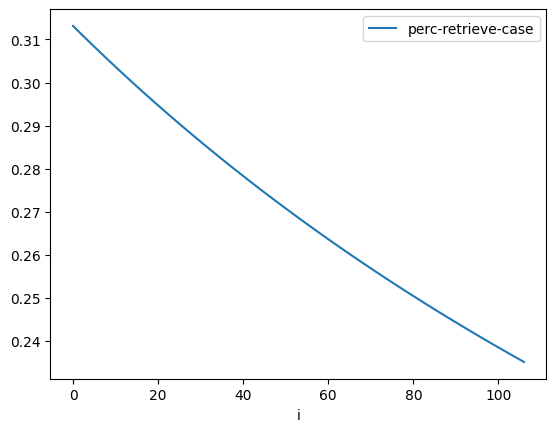

In [ ]:
_ = df.plot(x='i', y='perc-retrieve-case', kind='line')

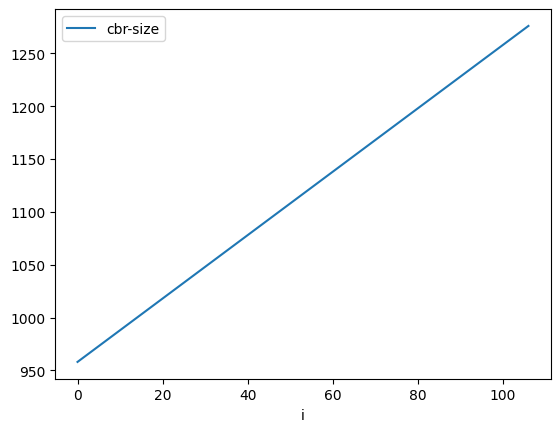

In [ ]:
_ = df.plot(x='i', y='cbr-size', kind='line')

In [ ]:
# from sklearn.model_selection import cross_val_score